In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('customer_churn_data-1.csv')
df

,Gender,Age,Payment Method,LastTransaction,Churn
0,male,64.0,credit card,98.0,loyal
1,male,35.0,cheque,118.0,churn
2,female,25.0,credit card,107.0,loyal
3,female,39.0,credit card,177.0,NaN
4,male,39.0,credit card,90.0,loyal
...,...,...,...,...,...
991,female,29.0,credit card,33.0,loyal
992,male,84.0,credit card,124.0,loyal
993,male,20.0,credit card,60.0,NaN
994,male,19.0,credit card,49.0,loyal


<h1>Obj 1 : fill all empty</h1>

In [3]:
for col in df.columns :
    print("Total null/empty of column {} = {} from {}".format(col,df[col].isnull().sum(),len(df.index)))
#df[['Gender']].isnull().sum()


Total null/empty of column Gender = 0 from 996
Total null/empty of column Age = 4 from 996
Total null/empty of column Payment Method = 0 from 996
Total null/empty of column LastTransaction = 0 from 996
Total null/empty of column Churn = 96 from 996


<h3>Observation : Age null 4 , Churn null 96</h3>

In [23]:
#df_age = df[['Age']]
#df_churn = df[['Churn']]

In [22]:
#age_mean = df_age.mean()
#age_median = df_age.median()
#age_mode = df_age.mode(dropna=False).to_numpy()[0][0]
#age_mode

In [21]:
#df_churn[df_churn == 'loyal'].dropna()
#df_churn[df_churn == 'churn'].dropna()
#df_churn = df_churn.replace(regex=['loyal'], value=1)
#df_churn = df_churn.replace(regex=['churn'], value=0)
#churn_mode = df_churn.mode(dropna=False).to_numpy()[0][0]
#churn_mode

<h3>fill Nan with Mode</h3>

In [17]:
#df_age = df_age.fillna(age_mode)
#df_age

In [18]:
#df_churn = df_churn.fillna(churn_mode)
#df_churn

In [19]:
#df_age
#df_churn
#df = df.assign(Age=df_age,Churn=df_churn)
#df

<h3>No more NaN ~~</h3>

In [20]:
#df.isna().sum()

<h1>Obj 2 :</h1>
<h3>อาจารย์ขอเปลี่ยน เป็น avg ของค่า age หรือ mean ก็ได้ค่ะ แล้ว churn ที่ใช้เป็น label prediction ก็ให้ drop ส่วนที่ว่างNaNออกไป</h3>

In [4]:
age_mean = df[['Age']].mean().round(1)
age_mean
df[['Age']] = df[['Age']].fillna(age_mean)
df[['Age']]
#df[['Age']].isna().sum()

,Age
0,64.0
1,35.0
2,25.0
3,39.0
4,39.0
...,...
991,29.0
992,84.0
993,20.0
994,19.0


In [5]:
df[['Age']].isna().sum()

Age    0
dtype: int64

In [6]:
print("Total Amount for now = ",df.count())

Total Amount for now =  Gender             996
Age                996
Payment Method     996
LastTransaction    996
Churn              900
dtype: int64


In [7]:
df

,Gender,Age,Payment Method,LastTransaction,Churn
0,male,64.0,credit card,98.0,loyal
1,male,35.0,cheque,118.0,churn
2,female,25.0,credit card,107.0,loyal
3,female,39.0,credit card,177.0,NaN
4,male,39.0,credit card,90.0,loyal
...,...,...,...,...,...
991,female,29.0,credit card,33.0,loyal
992,male,84.0,credit card,124.0,loyal
993,male,20.0,credit card,60.0,NaN
994,male,19.0,credit card,49.0,loyal


In [8]:
#df.dropna()ทางออกฉุกเฉิน
df = df.dropna(subset=['Churn'])
df

,Gender,Age,Payment Method,LastTransaction,Churn
0,male,64.0,credit card,98.0,loyal
1,male,35.0,cheque,118.0,churn
2,female,25.0,credit card,107.0,loyal
4,male,39.0,credit card,90.0,loyal
5,female,28.0,cheque,189.0,churn
...,...,...,...,...,...
990,male,19.0,credit card,92.0,loyal
991,female,29.0,credit card,33.0,loyal
992,male,84.0,credit card,124.0,loyal
994,male,19.0,credit card,49.0,loyal


In [9]:
print("Total Amount for now = ",df.count())

Total Amount for now =  Gender             900
Age                900
Payment Method     900
LastTransaction    900
Churn              900
dtype: int64


In [10]:
df[['Churn']].isna().sum()

Churn    0
dtype: int64

In [11]:
df[['Age']].isna().sum()

Age    0
dtype: int64

In [12]:
df.count()

Gender             900
Age                900
Payment Method     900
LastTransaction    900
Churn              900
dtype: int64

<h1>Obj 3 :</h1>
<h3> Age เป็น int ไม่floatนะ ไม่งั้นใช้ median เหมือนเดิมก็ได้ค่ะ

หลังจากนี้ให้แยก data training , test 70/30

แล้ว classify ด้วย Decision Tree ค่ะ</h3>

In [13]:
df[['Age']] = df[['Age']].astype(int)
df

/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Gender,Age,Payment Method,LastTransaction,Churn
0,male,64,credit card,98.0,loyal
1,male,35,cheque,118.0,churn
2,female,25,credit card,107.0,loyal
4,male,39,credit card,90.0,loyal
5,female,28,cheque,189.0,churn
...,...,...,...,...,...
990,male,19,credit card,92.0,loyal
991,female,29,credit card,33.0,loyal
992,male,84,credit card,124.0,loyal
994,male,19,credit card,49.0,loyal


In [14]:
#male = 0 , female = 1
df['Gender'].loc[df['Gender'] == 'male'] = 0
df['Gender'].loc[df['Gender'] == 'female'] = 1
df[['Gender']]

/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is

,Gender
0,0
1,0
2,1
4,0
5,1
...,...
990,0
991,1
992,0
994,0


In [15]:
df['Payment Method'].unique()

array(['credit card', 'cheque', 'cash'], dtype=object)

In [16]:
df['Payment Method'].loc[df['Payment Method'] == 'cash'] = 1
df['Payment Method'].loc[df['Payment Method'] == 'cheque'] = 2
df['Payment Method'].loc[df['Payment Method'] == 'credit card'] = 3
df

/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This i

,Gender,Age,Payment Method,LastTransaction,Churn
0,0,64,3,98.0,loyal
1,0,35,2,118.0,churn
2,1,25,3,107.0,loyal
4,0,39,3,90.0,loyal
5,1,28,2,189.0,churn
...,...,...,...,...,...
990,0,19,3,92.0,loyal
991,1,29,3,33.0,loyal
992,0,84,3,124.0,loyal
994,0,19,3,49.0,loyal


In [17]:
X = df.loc[:, "Gender":"LastTransaction"]
y = df[['Churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [18]:
X_test

,Gender,Age,Payment Method,LastTransaction
343,0,34,3,129.0
916,1,48,1,150.0
121,0,53,3,138.0
645,0,19,1,71.0
911,1,70,1,104.0
...,...,...,...,...
377,0,85,1,166.0
214,1,33,3,191.0
295,0,40,3,102.0
814,1,90,3,109.0


In [19]:
y_test

,Churn
343,churn
916,loyal
121,loyal
645,loyal
911,loyal
...,...
377,churn
214,churn
295,loyal
814,loyal


In [20]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [21]:
for i in range(5) :
    print("Input ---> ",clf.predict(X_test.iloc[[i]]))
    print("Output ---> ",y_test.iloc[ i , : ].values)

Input --->  ['loyal']
Output --->  ['churn']
Input --->  ['loyal']
Output --->  ['loyal']
Input --->  ['loyal']
Output --->  ['loyal']
Input --->  ['loyal']
Output --->  ['loyal']
Input --->  ['churn']
Output --->  ['loyal']


<h1>Obj 4 :</h1>
<h3> ดึง accuracy score ออกมา </h3>
<h3> ver_1 - Non K fold </h3>
<h3> ver_2 - K fold </h3>
<h3> ver_3 - 5 & 10-folds + [ see the value ] </h3>
<h3> train/test - 80/20 </h3>

In [22]:
pred = clf.predict(X_test)
score = accuracy_score(y_test, pred)
#score = clf.score(X_test, y_test)
print("Accuracy score is ",score.round(2),"%")

Accuracy score is  0.76 %


<h2>Observation</h2><h3>Non K fold : Accuracy = 0.68% 0.75% 0.74%</h3>

In [23]:
X_df = df
y_df = df[['Churn']]

<h3>KFold = 3</h3>

In [24]:
kf10 = KFold(n_splits=10, shuffle=False)
kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [25]:
print(kf3)
print(kf5)
print(kf10)

KFold(n_splits=3, random_state=None, shuffle=False)
KFold(n_splits=5, random_state=None, shuffle=False)
KFold(n_splits=10, random_state=None, shuffle=False)


In [26]:
df_kf = df
df_kf

,Gender,Age,Payment Method,LastTransaction,Churn
0,0,64,3,98.0,loyal
1,0,35,2,118.0,churn
2,1,25,3,107.0,loyal
4,0,39,3,90.0,loyal
5,1,28,2,189.0,churn
...,...,...,...,...,...
990,0,19,3,92.0,loyal
991,1,29,3,33.0,loyal
992,0,84,3,124.0,loyal
994,0,19,3,49.0,loyal


In [27]:
df_kf['Churn'].loc[df_kf['Churn'] == 'loyal'] = 1
df_kf['Churn'].loc[df_kf['Churn'] == 'churn'] = 0
df_kf

/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,Gender,Age,Payment Method,LastTransaction,Churn
0,0,64,3,98.0,1
1,0,35,2,118.0,0
2,1,25,3,107.0,1
4,0,39,3,90.0,1
5,1,28,2,189.0,0
...,...,...,...,...,...
990,0,19,3,92.0,1
991,1,29,3,33.0,1
992,0,84,3,124.0,1
994,0,19,3,49.0,1


<h2>KF 3</h2>

Accuracy for the fold no. 1 on the test set: 0.48333333333333334
Accuracy for the fold no. 2 on the test set: 0.65
Accuracy for the fold no. 3 on the test set: 0.53


/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://p

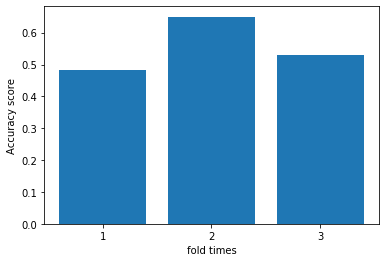

In [28]:
i = 1
arr_ = []
X_train,X_test,y_train,y_test = [],[],[],[]
for train_index, test_index in kf3.split(df_kf):
    X_train = df_kf.iloc[train_index].loc[:, "Gender":"LastTransaction"]
    X_test = df_kf.iloc[test_index].loc[:, "Gender":"LastTransaction"]
    y_train = df_kf.iloc[train_index].loc[:,'Churn']
    y_test = df_kf.loc[test_index]['Churn']
         
    #Train the model
    clf.fit(X_train, y_train) #Training the model
    y_test = y_test.fillna(y_test.mode(dropna = False)[0])
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, clf.predict(X_test))}")
    arr_.append(accuracy_score(y_test, clf.predict(X_test)))
    i += 1
    
    
plt.bar(np.array(["1", "2", "3"]),arr_)
plt.xlabel("fold times")
plt.ylabel("Accuracy score")
plt.show()

<h2>KF 5</h2>

Accuracy for the fold no. 1 on the test set: 0.45555555555555555
Accuracy for the fold no. 2 on the test set: 0.5111111111111111
Accuracy for the fold no. 3 on the test set: 0.6222222222222222
Accuracy for the fold no. 4 on the test set: 0.5888888888888889
Accuracy for the fold no. 5 on the test set: 0.5222222222222223


/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://p

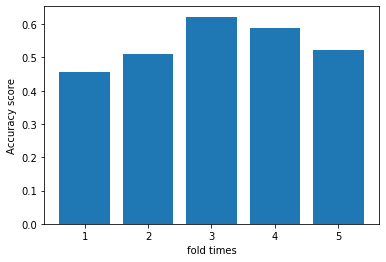

In [29]:
i = 1
arr_ = []
X_train,X_test,y_train,y_test = [],[],[],[]
for train_index, test_index in kf5.split(df_kf):
    X_train = df_kf.iloc[train_index].loc[:, "Gender":"LastTransaction"]
    X_test = df_kf.iloc[test_index].loc[:, "Gender":"LastTransaction"]
    y_train = df_kf.iloc[train_index].loc[:,'Churn']
    y_test = df_kf.loc[test_index]['Churn']
         
    #Train the model
    clf.fit(X_train, y_train) #Training the model
    y_test = y_test.fillna(y_test.mode(dropna = False)[0])
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, clf.predict(X_test))}")
    arr_.append(accuracy_score(y_test, clf.predict(X_test)))
    i += 1
    
    
plt.bar(np.array(["1", "2", "3","4","5"]),arr_)
plt.xlabel("fold times")
plt.ylabel("Accuracy score")
plt.show()

<h2>KF 10</h2>

Accuracy for the fold no. 1 on the test set: 0.5
Accuracy for the fold no. 2 on the test set: 0.5
Accuracy for the fold no. 3 on the test set: 0.5111111111111111
Accuracy for the fold no. 4 on the test set: 0.5222222222222223
Accuracy for the fold no. 5 on the test set: 0.7222222222222222
Accuracy for the fold no. 6 on the test set: 0.5444444444444444
Accuracy for the fold no. 7 on the test set: 0.5555555555555556
Accuracy for the fold no. 8 on the test set: 0.5555555555555556
Accuracy for the fold no. 9 on the test set: 0.6
Accuracy for the fold no. 10 on the test set: 0.5


/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/Users/husker.s/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://p

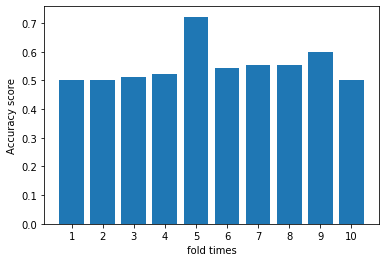

In [30]:
i = 1
arr_ = []
X_train,X_test,y_train,y_test = [],[],[],[]
for train_index, test_index in kf10.split(df_kf):
    X_train = df_kf.iloc[train_index].loc[:, "Gender":"LastTransaction"]
    X_test = df_kf.iloc[test_index].loc[:, "Gender":"LastTransaction"]
    y_train = df_kf.iloc[train_index].loc[:,'Churn']
    y_test = df_kf.loc[test_index]['Churn']
         
    #Train the model
    clf.fit(X_train, y_train) #Training the model
    y_test = y_test.fillna(y_test.mode(dropna = False)[0])
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, clf.predict(X_test))}")
    arr_.append(accuracy_score(y_test, clf.predict(X_test)))
    i += 1
    
plt.bar(np.array(["1", "2", "3","4","5","6", "7", "8","9","10"]),arr_)
plt.xlabel("fold times")
plt.ylabel("Accuracy score")
plt.show()

[0.73, 0.72, 0.75, 0.73, 0.73, 0.74, 0.73, 0.74, 0.74, 0.73]
[0.8, 0.79, 0.8, 0.8, 0.8, 0.79, 0.81, 0.79, 0.82, 0.8]


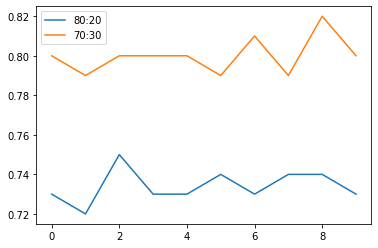

In [41]:
X = df.loc[:, "Gender":"LastTransaction"]
y = df[['Churn']]
X82_train, X82_test, y82_train, y82_test = train_test_split(X, y, test_size=0.20)
X73_train, X73_test, y73_train, y73_test = train_test_split(X, y, test_size=0.30)

arr_score82 = []
arr_score73 = []

for i in range(10):
    clf.fit(X82_train,y82_train)
    pred = clf.predict(X82_test)
    #print("Accuracy score 80:20 round {} is".format(i+1),accuracy_score(y82_test, pred).round(2)," %")
    arr_score82.append(accuracy_score(y82_test, pred).round(2))

    clf.fit(X73_train,y73_train)
    pred = clf.predict(X73_test)
    #print("Accuracy score 70:30 round {} is".format(i+1),accuracy_score(y73_test, pred).round(2)," %")
    arr_score73.append(accuracy_score(y73_test, pred).round(2))
    
print(arr_score82)
print(arr_score73)



plt.plot(arr_score82, label = "80:20")
plt.plot(arr_score73, label = "70:30")
plt.legend()
plt.show()